# Proyecto del Día 18 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

Te deseo mucho aprendizaje, pero sobre todo, mucha diversión.
¡Adelante!

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
URL = "https://api.thedogapi.com/v1/breeds"

In [7]:
def get_data():
    return requests.get(URL)

response = get_data()
if response.status_code == 200:
    data = response.json()
else:
    data = {}

In [100]:
df = pd.DataFrame(data)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weight              172 non-null    object
 1   height              172 non-null    object
 2   id                  172 non-null    int64 
 3   name                172 non-null    object
 4   bred_for            151 non-null    object
 5   breed_group         156 non-null    object
 6   life_span           172 non-null    object
 7   temperament         168 non-null    object
 8   origin              5 non-null      object
 9   reference_image_id  172 non-null    object
 10  country_code        12 non-null     object
 11  description         1 non-null      object
 12  history             2 non-null      object
dtypes: int64(1), object(12)
memory usage: 17.6+ KB


In [113]:
min_life_span = []
max_life_span = []
personality = []
personality_count = []
for dog in data:
    life_span = dog["life_span"].split(" ")
    if len(life_span) >= 3:
        min_life_span.append(float(life_span[0]))
        max_life_span.append(float(life_span[2]))
    elif len(life_span) == 2:
        min_life_span.append(float(life_span[0]))
        max_life_span.append(float(life_span[0]))

    
    try:
        temperaments = dog["temperament"].split(",")
        if len(temperaments) >= 1:
            for temperament in temperaments:
                temp = temperament.strip()
                personality.append(temp)
                personality_count.append(1)
    except:
        continue

In [115]:
df_personality = pd.DataFrame({
    "personality":personality,
    "count": personality_count
})

In [149]:
df_personality

,personality,count
0,Stubborn,1
1,Curious,1
2,Playful,1
3,Adventurous,1
4,Active,1
...,...,...
1023,Bold,1
1024,Independent,1
1025,Confident,1
1026,Intelligent,1


In [168]:
conteo = (df_personality.groupby("personality", as_index=False)["count"].sum().sort_values(by="count", ascending=False, ignore_index=True))
print(f"El temperamento mas frecuente entre todas las razas de perros es {conteo["personality"][0]}")

El temperamento mas frecuente entre todas las razas de perros es Intelligent


In [169]:
conteo

,personality,count
0,Intelligent,93
1,Affectionate,54
2,Alert,52
3,Friendly,48
4,Loyal,48
...,...,...
119,People-Oriented,1
120,Rational,1
121,Receptive,1
122,Refined,1


In [92]:
df_life_span = pd.DataFrame({
    "min_life_span":min_life_span,
    "max_life_span":max_life_span
})

In [156]:
x_min = df_life_span["min_life_span"].mode()[0]
x_max = df_life_span["max_life_span"].mode()[0]
print(f"La esperanza de vida mínima y máxima mas frecuente para todas las especies de perro es min = {x_min:.0f}, max = {x_max:.0f} años")

La esperanza de vida mínima y máxima mas frecuente para todas las especies de perro es min = 12, max = 15 años


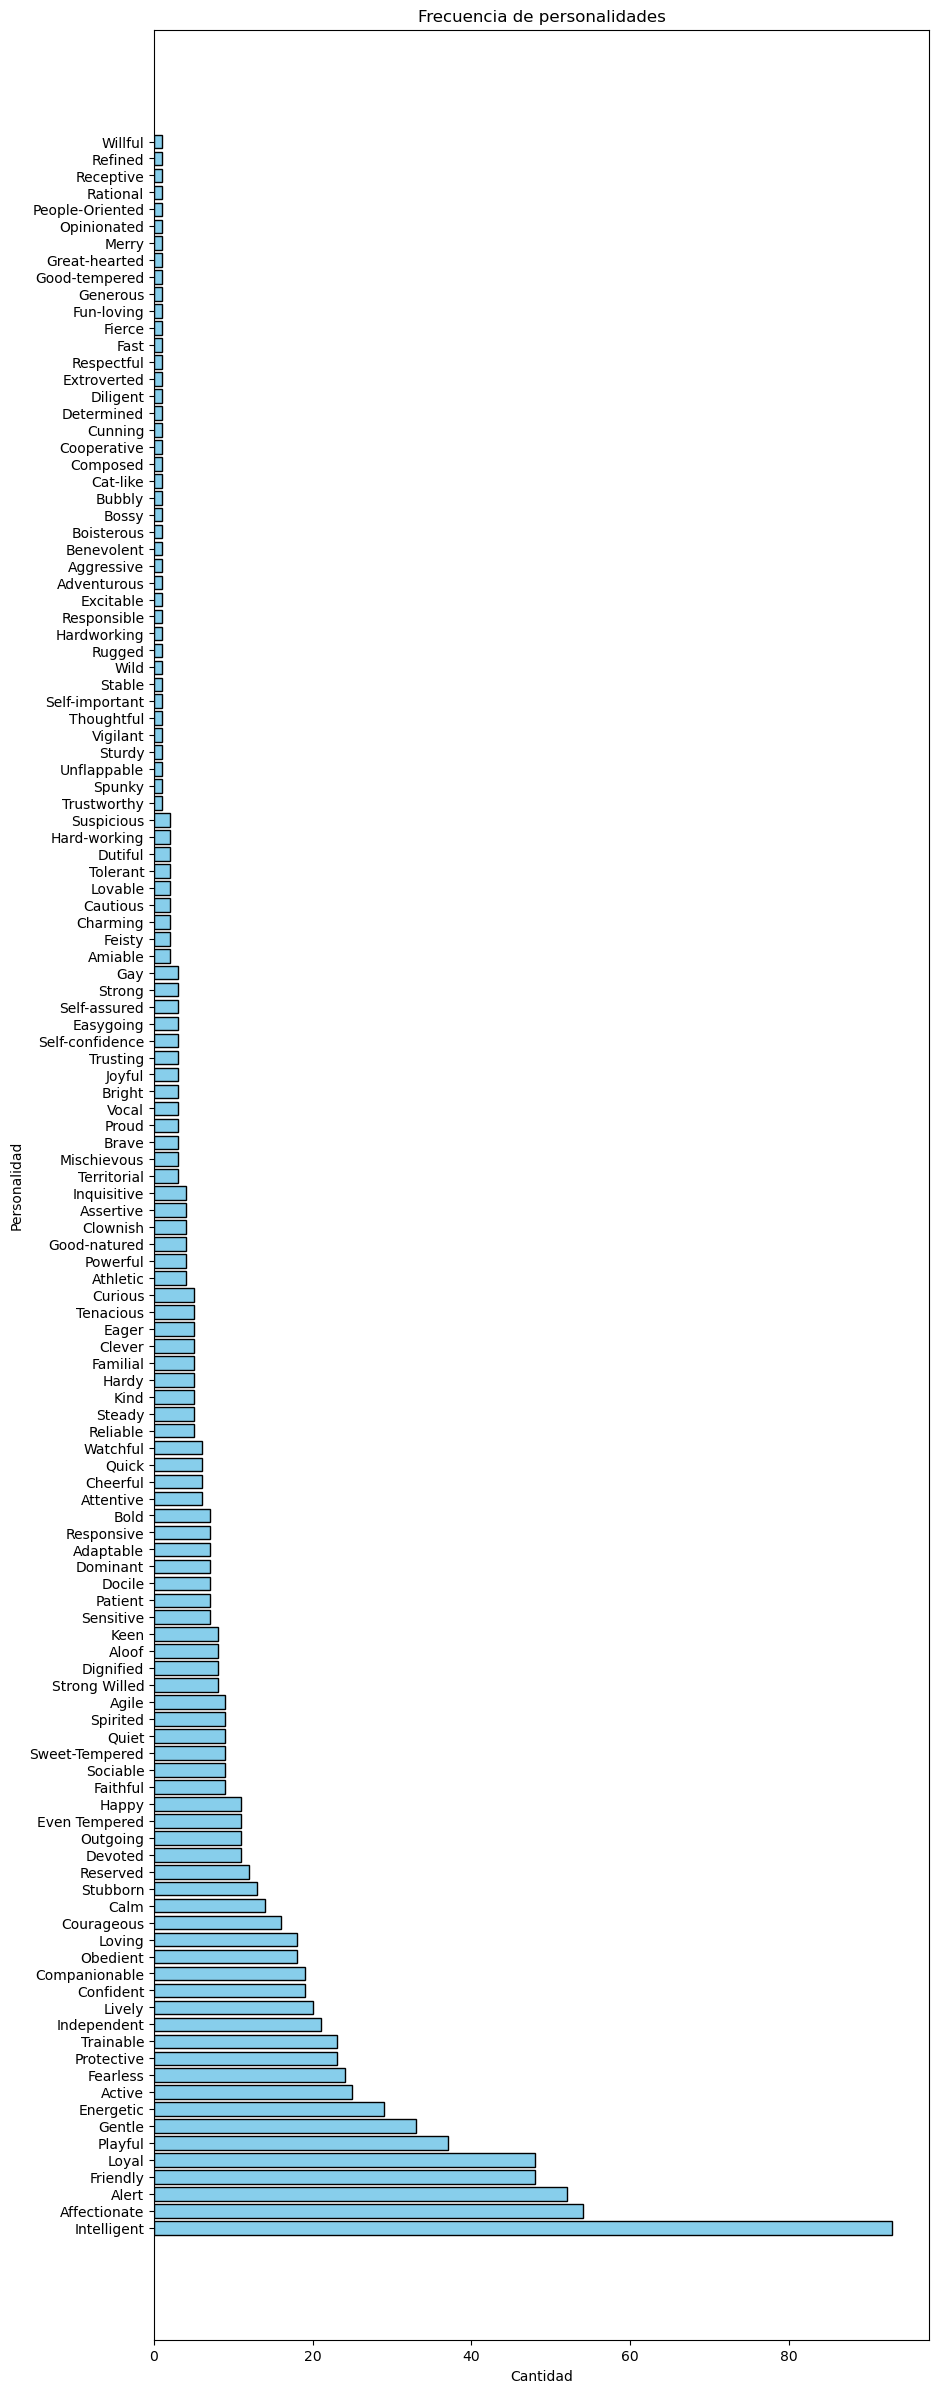

In [178]:
#Graficas
fig1 = plt.figure(figsize=(10,30))
# Crear gráfico de barras horizontales
plt.barh(conteo["personality"], conteo["count"], color="skyblue", edgecolor="black")

# Etiquetas y título
plt.xlabel("Cantidad")
plt.ylabel("Personalidad")
plt.title("Frecuencia de personalidades")

# Mostrar gráfico
plt.show()

In [ ]:
plt.bar